# Part 2: Finding Associations
In Part 1, we started looking at some trends in the data. There are fun associations that fans would likely find amusing or obvious. But there are also associations that may suggest deeper cultural norms about how certain categories of people are depicted in fiction. In this section, we look at four dimensions that speak to important demographic categories: `straight_queer`, `young_old`, `masculine_feminine`, and `rich_poor`. It is important to note that, by categorizing characters based on respondents' ratings on these dimensions, we are assessing how _perceptions_ of these categories are related to _perceptions_ of other dimensions.

### Imports

In [1]:
# importing data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import random

### Reading the Data

In [2]:
# read processed data from part 1 notebook
char_score_data = pd.read_csv("data/processed/char_score_data.csv")
char_score_data.head()

,id,character,source,playful_serious,shy_bold,cheery_sorrowful,masculine_feminine,charming_awkward,lewd_tasteful,intellectual_physical,...,cringing-away_welcoming-experience,stereotypical_boundary-breaking,energetic_mellow,hopeful_fearful,likes-change_resists-change,manic_mild,old-fashioned_progressive,gross_hygienic,stable_unstable,overthinker_underthinker
0,HML/1,Prince Hamlet,Hamlet,62.4,69.8,92.6,31.9,61.2,53.5,28.8,...,27.5,78.8,40.5,53.4,77.4,14.0,56.3,51.4,87.4,8.2
1,HML/2,Queen Gertrude,Hamlet,79.1,62.2,68.5,78.1,36.9,40.3,42.6,...,42.8,23.9,84.9,73.7,49.0,73.7,21.1,71.0,26.3,63.3
2,HML/3,King Claudius,Hamlet,83.2,85.3,69.4,21.8,39.1,35.8,49.9,...,11.3,29.7,50.7,78.6,68.2,20.3,31.6,48.7,74.3,55.0
3,HML/4,Polonius,Hamlet,72.5,65.0,67.1,28.2,66.3,47.9,30.4,...,31.6,22.2,75.7,60.4,79.0,55.9,25.5,48.2,80.1,49.6
4,HML/5,Ophelia,Hamlet,40.7,48.1,81.8,90.0,52.6,59.3,41.1,...,35.6,42.4,75.0,61.7,61.3,15.1,57.3,54.7,90.3,24.9


### Association Visualization

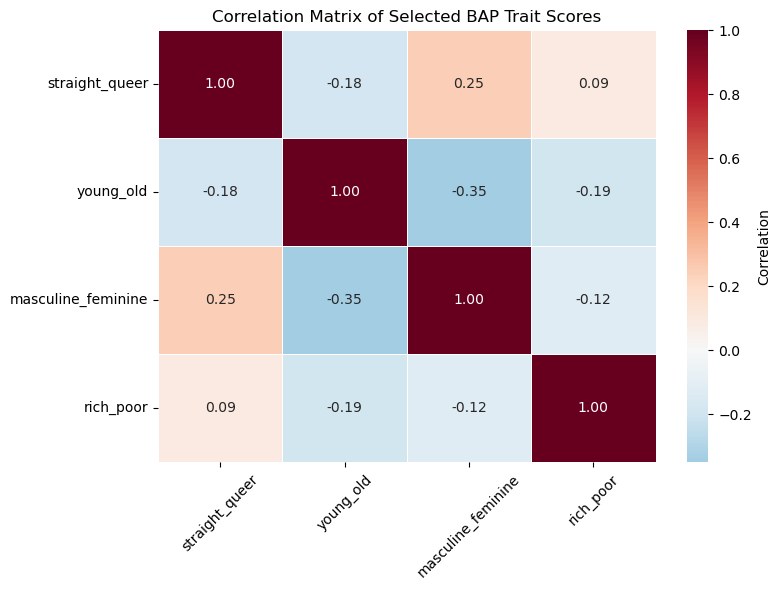

In [3]:
# selected bap features/dimensions of interest
dimensions = ["straight_queer", "young_old", "masculine_feminine", "rich_poor"]
corr = char_score_data[dimensions].corr().round(2)  # round to 2 decimals

# set up figure
plt.figure(figsize=(8, 6))

# create heatmap with diverging red-blue colors and annotations
sns.heatmap(
    corr,
    annot=True,           # show correlation values
    fmt=".2f",            # 2 decimal places
    cmap="RdBu_r",        # diverging red-blue
    center=0,             # center at 0 for +/- interpretation
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5
)

# labels and title
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Selected BAP Trait Scores")
plt.tight_layout()

# save plot to visualizations folder
plt.savefig("visualizations/selected_dim_correlation_map.png", dpi=300, bbox_inches="tight")

# show plot
plt.show()

We see that the features are not very strongly (pairwise) correlated with each other. This is good as we don't need to reduce dimensionality.